# Face Recognition Olivetti dataset

[scikit-learn.org: The Olivetti faces dataset](https://scikit-learn.org/stable/datasets/real_world.html#olivetti-faces-dataset)
[www.kaggle.com: Olivetti Faces](https://www.kaggle.com/datasets/sahilyagnik/olivetti-faces?datasetId=11928)

In [116]:
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
# from sklearn.datasets import fetch_olivetti_faces
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
data = sklearn.datasets.fetch_olivetti_faces(data_home='../data/scikit_learn_data', shuffle=False, random_state=123, return_X_y=False)
print(data.keys())
print(data.DESCR)

dict_keys(['data', 'images', 'target', 'DESCR'])
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    ========

C:\Users\user\AppData\Local\Temp\ipykernel_22160\2779974791.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows, n_cols, i+1)


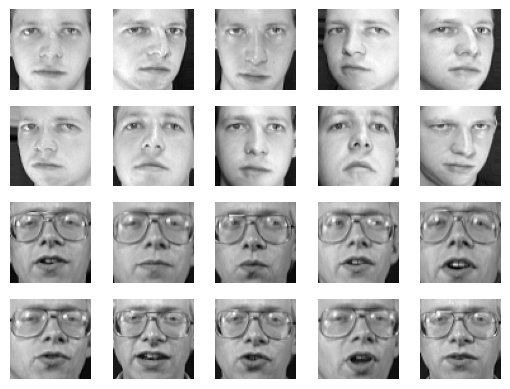

In [103]:
img = data.images[0, :, :]
fig, ax = plt.subplots()
n = 20
n_cols = 5
n_rows = n // n_cols
for i in range(n):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(data.images[i, :, :], cmap='gray')
    plt.axis('off')
plt.show()

In [104]:
train_index, test_index = next(StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123).split(X=data.data, y=data.target))

In [105]:
X_train = data.data[train_index]
X_test = data.data[test_index]
y_train = data.target[train_index]
y_test = data.target[test_index]

In [120]:
x_inertia = list(range(2, 50, 5))
y_inertia = [KMeans(n_clusters=cluster, random_state=123).fit(X=X_train).inertia_ for cluster in x_inertia]
y_inertia

[21310.76171875,
 16225.59765625,
 14695.7099609375,
 13321.9228515625,
 12132.11328125,
 11236.22265625,
 10413.0068359375,
 9779.220703125,
 9103.2529296875,
 8647.1240234375]

<AxesSubplot: >

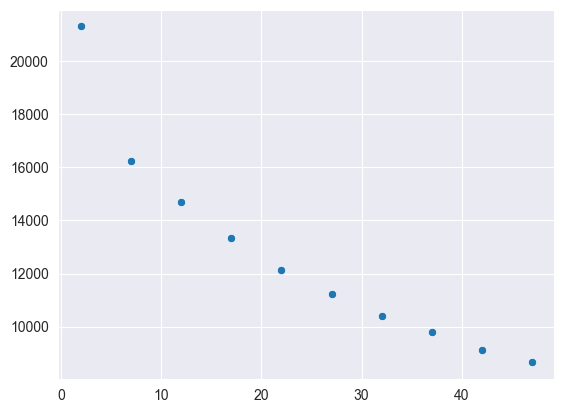

In [121]:
sns.scatterplot(x=x_inertia, y=y_inertia)